## Analysis of housing information

### Problem 1: Obtaining a dataset

In [45]:
import pandas as pd
from pandas import DataFrame

dataset: DataFrame =  pd.read_csv("./train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Problem 2: Investigating the dataset itself

The dataset is from the Kaggle competition "House Prices: Advanced Regression Techniques." It contains 79 explanatory variables describing various aspects of residential homes in Ames, Iowa. The goal is to predict the sale prices of these homes. Key features include information on building class, zoning classification, lot size, road access, building configuration, year built, and many others. Participants are encouraged to use advanced regression techniques and creative feature engineering to enhance prediction accuracy. The dataset is widely used for practicing machine learning skills and is suitable for individuals with some experience in R or Python and basic machine learning concepts.

- **Dataset Source:**
  - Kaggle competition: "House Prices: Advanced Regression Techniques"

- **Dataset Content:**
  - 79 explanatory variables describing residential homes in Ames, Iowa.

- **Objective:**
  - Predict the sale prices of homes.

- **Key Features:**
  - SalePrice (target variable)
  - MSSubClass: Building class
  - MSZoning: Zoning classification
  - Lot size, road access, building configuration, year built, etc.

- **Task Challenges:**
  - Requires creative feature engineering.
  - Encourages the use of advanced regression techniques.

- **Learning Focus:**
  - Suitable for individuals with experience in R or Python and basic machine learning.

- **Additional Information:**
  - Dataset compiled by Dean De Cock for data science education.
  - Modernized and expanded version of the Boston Housing dataset.

- **Evaluation Metric:**
  - Root-Mean-Squared-Error (RMSE) between the logarithm of predicted and observed sale prices.

- **Submission Format:**
  - CSV file with columns for "Id" and "SalePrice."

- **Usage for Learning:**
  - Widely used for practicing machine learning skills.
  - Kaggle provides tutorials and courses to support learning efforts.

### Problem 3: Checking the data

#### See what each feature is about.

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Check which column is the target variable this time.

The target variable is 'SalePrice' and has the following distribution:


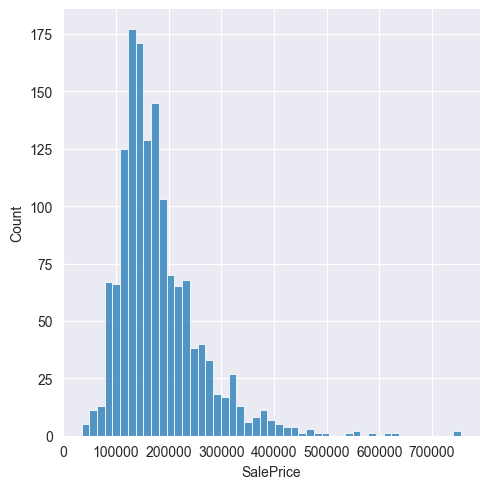

In [47]:
import seaborn as sns
target_variable = "SalePrice"
print(f"The target variable is '{target_variable}' and has the following distribution:")
sns.displot(dataset[target_variable]);

#### Display the mean, standard deviation, and quartiles of the feature values at once

In [48]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Problem 4: Dealing with missing values

#### Check for missing values for each feature

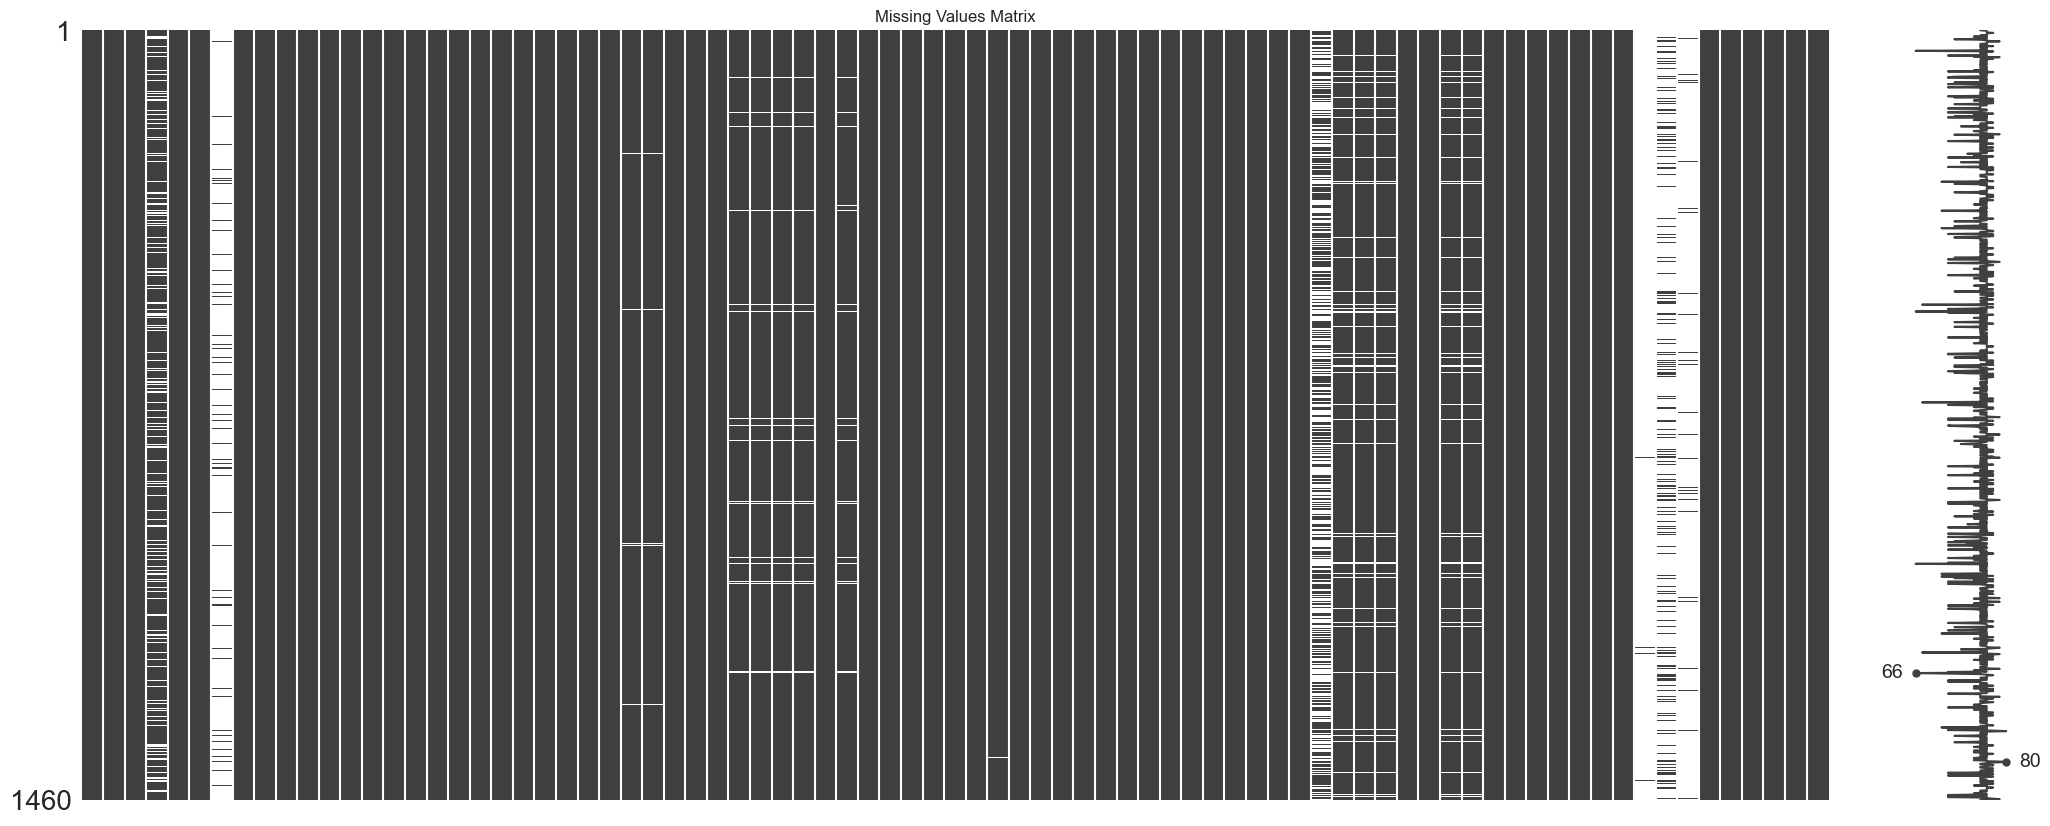

In [49]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(dataset)
plt.title("Missing Values Matrix")
plt.show()

#### Check the percentage of missing values

In [50]:
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100

total_missing_values = dataset.isnull().sum()

missing_info = pd.DataFrame({
    'feature': missing_percentage.index,
    'total': total_missing_values.values,
    'missing_ratio': missing_percentage.values,
})
missing_info.sort_values(by='missing_ratio', ascending=False)

,feature,total,missing_ratio
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
57,FireplaceQu,690,47.260274
...,...,...,...
27,ExterQual,0,0.000000
24,Exterior2nd,0,0.000000
23,Exterior1st,0,0.000000
22,RoofMatl,0,0.000000


#### Delete features (columns) that have 5 or more missing values

In [51]:
threshold = 5
features_to_drop = missing_info[missing_info['total'] >= threshold]['feature'].tolist()
data_cleaned: DataFrame = dataset.drop(columns=features_to_drop)

#### Samples (rows) with missing values are deleted from the data from which features with 5 or more missing values have been deleted.

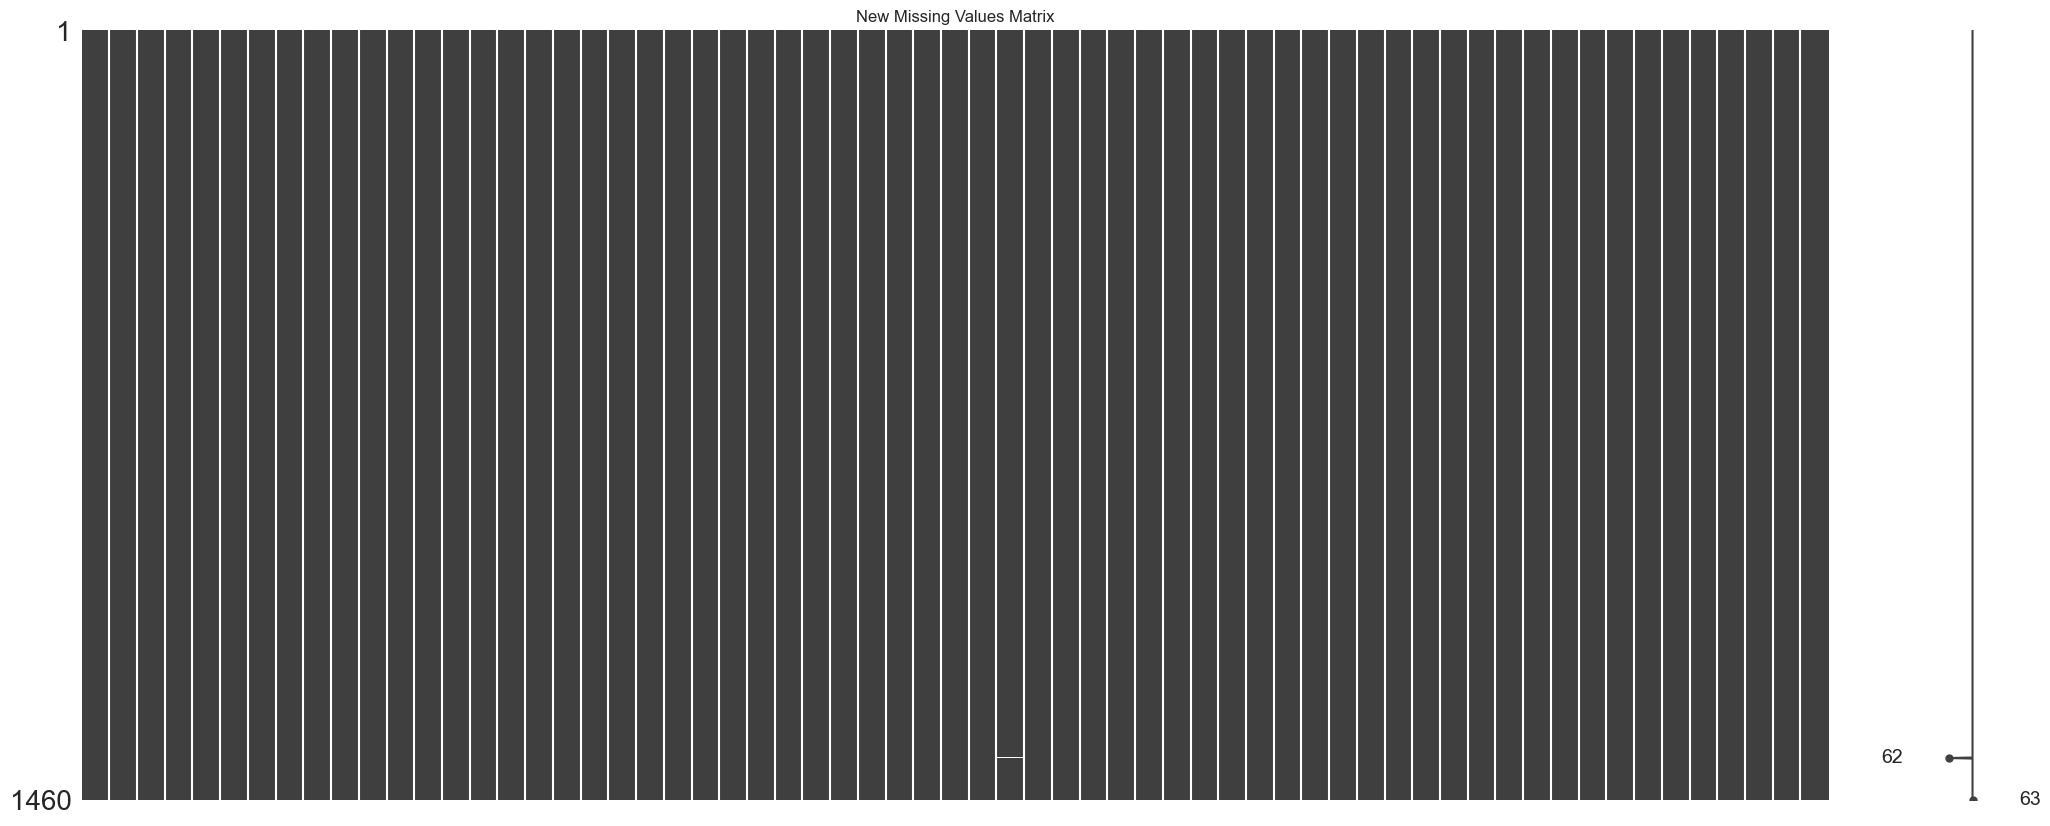

In [52]:
msno.matrix(data_cleaned)
plt.title("New Missing Values Matrix")
plt.show()